# WISE Infilling Example

Example of using proc_continuous to infill an arbitrary masked region of an image. This examples uses a subimage from the WISE 12 um dust map (tile 115).

Requires Julia Kernel

In [1]:
# import Pkg
# Pkg.add("FITSIO")
# Pkg.add("StatsBase")
# Pkg.add("CairoMakie")
# Pkg.add("ColorSchemes")
# Pkg.add("OffsetArrays")
# Pkg.add(url="https://github.com/andrew-saydjari/CloudClean.jl")

In [2]:
# using Pkg
# Pkg.add("IJulia")
# using IJulia
# IJulia.installkernel("julia", "--project=@.")


In [3]:
# Load needed packages

using Pkg
using FITSIO
using StatsBase
using CloudClean
using CairoMakie
using ColorSchemes
using OffsetArrays

In [4]:
#parameters. right click - format cell - mark as parameters
# This cell must be tagged with "parameters"

image_path = "default/image/path.fits"
mask_path = "default/mask/path.fits"
save_path = "default/save/path.fits"

"default/save/path.fits"

In [5]:
# Parameters
mask_path = "C:\\Users\\jhoffm72\\Documents\\FilPHANGS\\Data\\ngc0628_F770W\\Source_Removal\\_CDDfs0004pix_CDDfs0004pix_F770W_CDDfs_sources_S2N_mask.fits"
image_path = "C:\\Users\\jhoffm72\\Documents\\FilPHANGS\\Data\\OriginalImages\\ngc0628_F770W_JWST_Emission_starsub.fits"
save_path = "C:\\Users\\jhoffm72\\Documents\\FilPHANGS\\Data\\ngc0628_F770W\\Source_Removal\\OriginalImageSourcesRemoved.fits"


"C:\\Users\\jhoffm72\\Documents\\FilPHANGS\\Data\\ngc0628_F770W\\Source_Removal\\OriginalImageSourcesRemoved.fits"

In [6]:
# Open the FITS file and read data and header
f = FITS(image_path)
raw_image = read(f[1])
header = read_header(f[1])
close(f)

# Make a copy of the raw image data
out_image = copy(raw_image)

# Replace NaN values with 0.0
out_image[isnan.(raw_image)] .= 0.0



2511831-element view(::Vector{Float64}, [1, 2, 3, 4, 5, 6, 7, 8, 9, 10  …  4916591, 4916592, 4916593, 4916594, 4916595, 4916596, 4916597, 4916598, 4916599, 4916600]) with eltype Float64:
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 ⋮
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0

In [7]:
# Mask with missing pixels
f = FITS(mask_path)
raw_mask = read(f[1])
close(f)

# Convert the raw mask data into a boolean mask (True for masked pixels, False otherwise)
bimage = raw_mask .!= 0  # Create a boolean mask, True where non-zero

# Now bimage is a boolean array with True for masked pixels and False for unmasked pixels
println("Mask shape: ", size(bimage))

Mask shape: (1891, 2600)


In [8]:
Np = 33
out_image[bimage].= 0
count(bimage)

102839

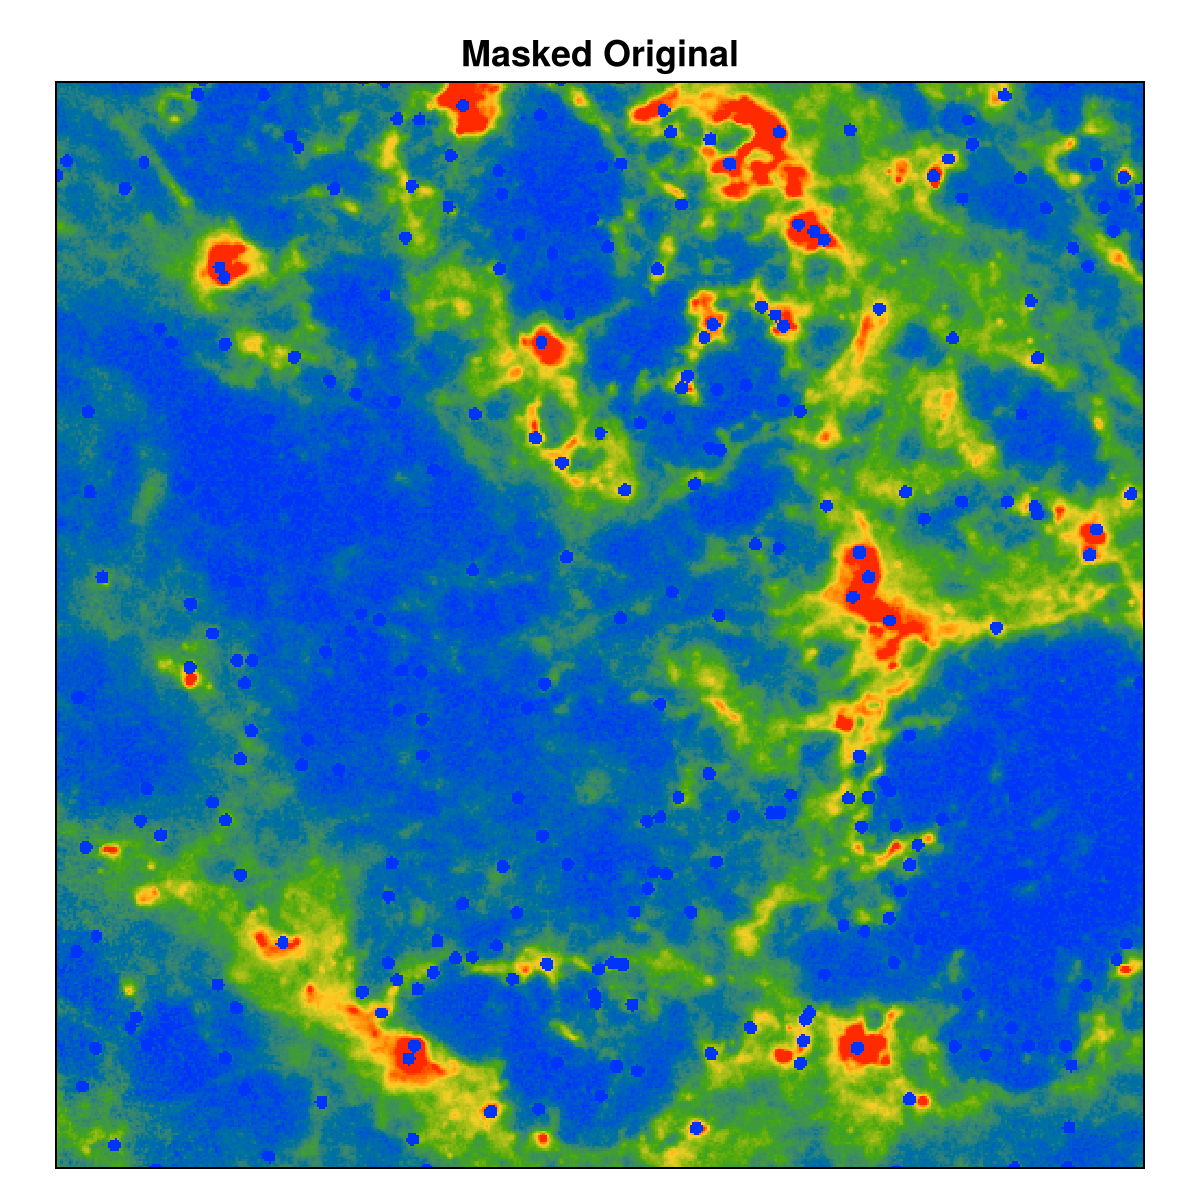

In [9]:
# Example values for cenx, ceny, and dv; adjust these based on your data
cenx = 579
ceny = 579
dv = 250

# Assuming raw_image is your image data and out_image is the image you want to display
# Compute the color range based on percentiles in a region around (cenx, ceny)
vmin, vmax = percentile(out_image[(cenx-dv):(cenx+dv), (ceny-dv):(ceny+dv)], [2, 99])

# Create a figure for plotting
fig = Figure(size=(600, 600), fontsize=18)

# Set up the axis with no ticks or labels
ax = Axis(fig[1,1], aspect=1, title="Masked Original", xticksvisible=false, yticksvisible=false, 
          xticklabelsvisible=false, yticklabelsvisible=false)

# Display the heatmap using the chosen colormap and the computed color range
h = heatmap!(ax, out_image[(cenx-dv):(cenx+dv), (ceny-dv):(ceny+dv)]',
    colormap=:rainbow_bgyr_35_85_c73_n256,
    colorrange=(vmin, vmax)
)

# Resize the figure to fit the layout
resize_to_layout!(fig)

# Show the figure
fig


In [10]:
ndraw0 = 2
widx = 129
x_locs = [cenx]
y_locs = [ceny]
star_stats = proc_continuous(out_image,bimage,Np=Np,tilex=4,ftype=64,widx=widx,seed=2022,ndraw=ndraw0)


# Debug: Check the structure of star_stats
if isa(star_stats, Tuple)
    println("star_stats is a tuple with length: ", length(star_stats))
    for i in 1:length(star_stats)
        println("star_stats[$i] has type: ", typeof(star_stats[i]), " and size: ", size(star_stats[i]))
    end
else
    println("star_stats is not a tuple. It has type: ", typeof(star_stats))
end

Infilling completed after 1 rounds with final width (widx,widy) = (27,27)


Finished 169 of 6888 locations in tile (1, 1)


Finished 193 of 8282 locations in tile (1, 2)
Finished 39 of 1986 locations in tile (1, 3)

Finished 0 of 0 locations in tile (1, 4)


Finished 213 of 8691 locations in tile (2, 1)


Finished 295 of 14039 locations in tile (2, 2)


Finished 267 of 11263 locations in tile (2, 3)

Finished 107 of 5242 locations in tile (2, 4)


Finished 157 of 7288 locations in tile (3, 1)


Finished 253 of 10626 locations in tile (3, 2)


Finished 260 of 10411 locations in tile (3, 3)


Finished 69 of 3772 locations in tile (3, 4)


Finished 0 of 0 locations in tile (4, 1)
Finished 22 of 1123 locations in tile (4, 2)

Finished 154 of 7276 locations in tile (4, 3)


Finished 124 of 5952 locations in tile (4, 4)


star_stats is a tuple with length: 2
star_stats[1] has type: Matrix

{

Float64} and size: (1891, 2600)
star_stats[2] has type: OffsetArray{Float64, 3, Array{Float64, 3}} and size: (1891, 2600, 2)


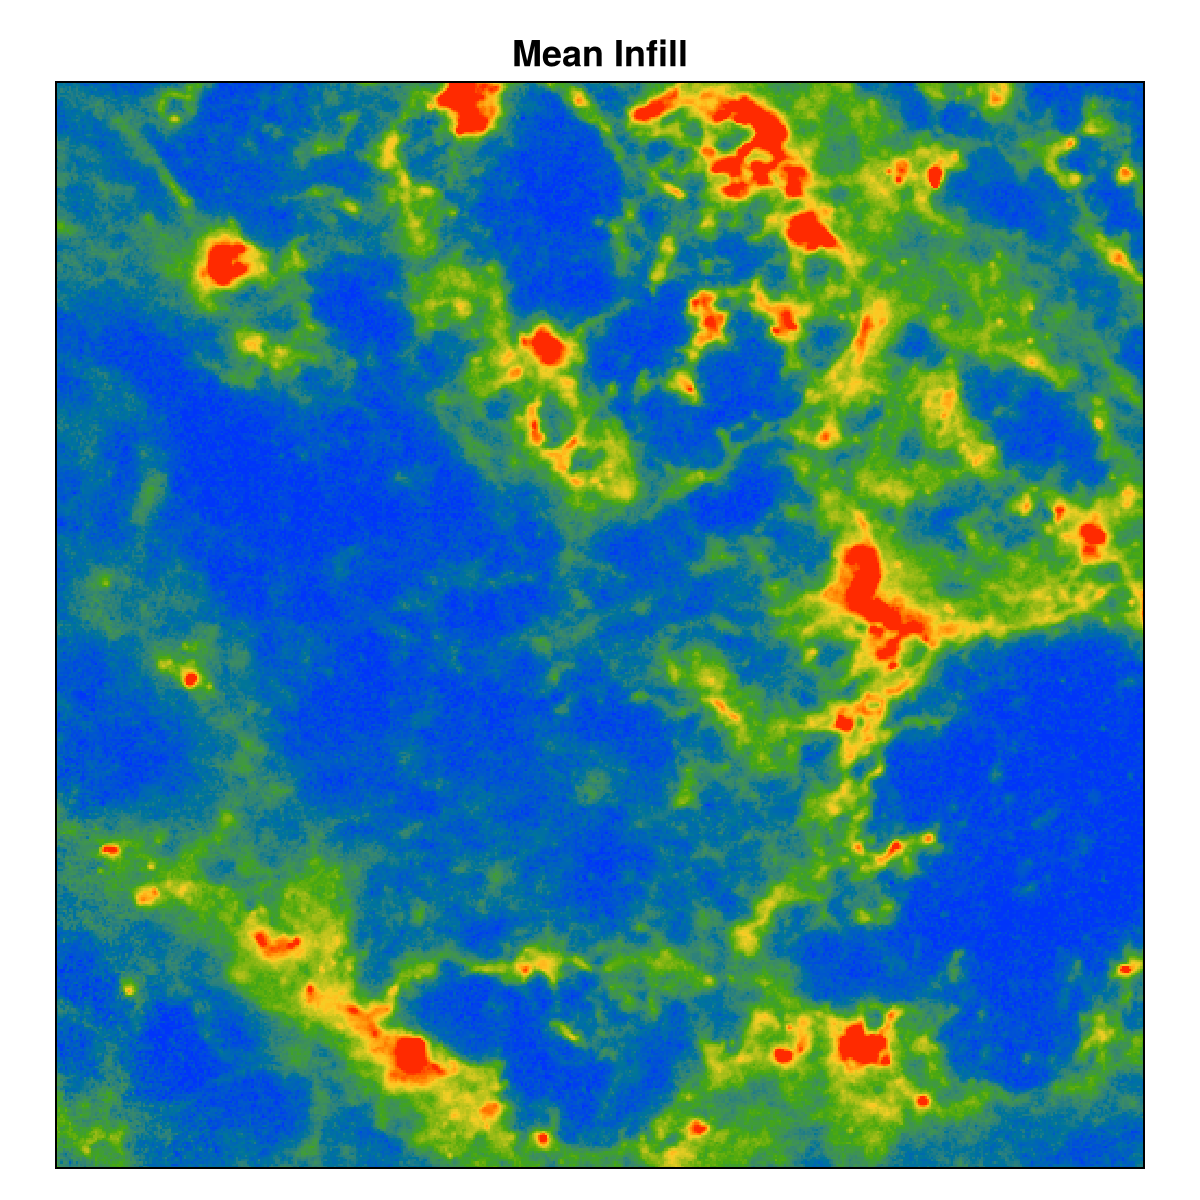

In [11]:
cenx = 579
ceny = 579
dv = 250
vmin, vmax = percentile(out_image[(cenx-dv):(cenx+dv),(ceny-dv):(ceny+dv)],[2,99])
fig = Figure(size=(600, 600), fontsize=18)
ax = Axis(fig[1,1], aspect=1, title="Mean Infill", xticksvisible=false, yticksvisible=false, 
          xticklabelsvisible=false, yticklabelsvisible=false)
h = heatmap!(ax,star_stats[1][(cenx-dv):(cenx+dv),(ceny-dv):(ceny+dv)]',
    colormap=:rainbow_bgyr_35_85_c73_n256,
    colorrange=(vmin,vmax)
)

resize_to_layout!(fig)
fig

In [12]:
dv = 250
fig = Figure(size=(600, 600), fontsize=18)
ax = Axis(fig[1,1], aspect=1, title="Draw Infill", xticksvisible=false, yticksvisible=false, 
          xticklabelsvisible=false, yticklabelsvisible=false)
h = heatmap!(ax,star_stats[2][(cenx-dv):(cenx+dv),(ceny-dv):(ceny+dv),1]',
    colormap=:rainbow_bgyr_35_85_c73_n256,
    colorrange=(vmin,vmax)
)

# Convert to a standard Array
array_data = max.(parent(star_stats[2]), 0)  # Set negative values to zero

# Open a FITS file and write
FITS(save_path, "w") do f
    write(f, convert(Array, array_data); header = header)  # Ensure it's a proper Array
end

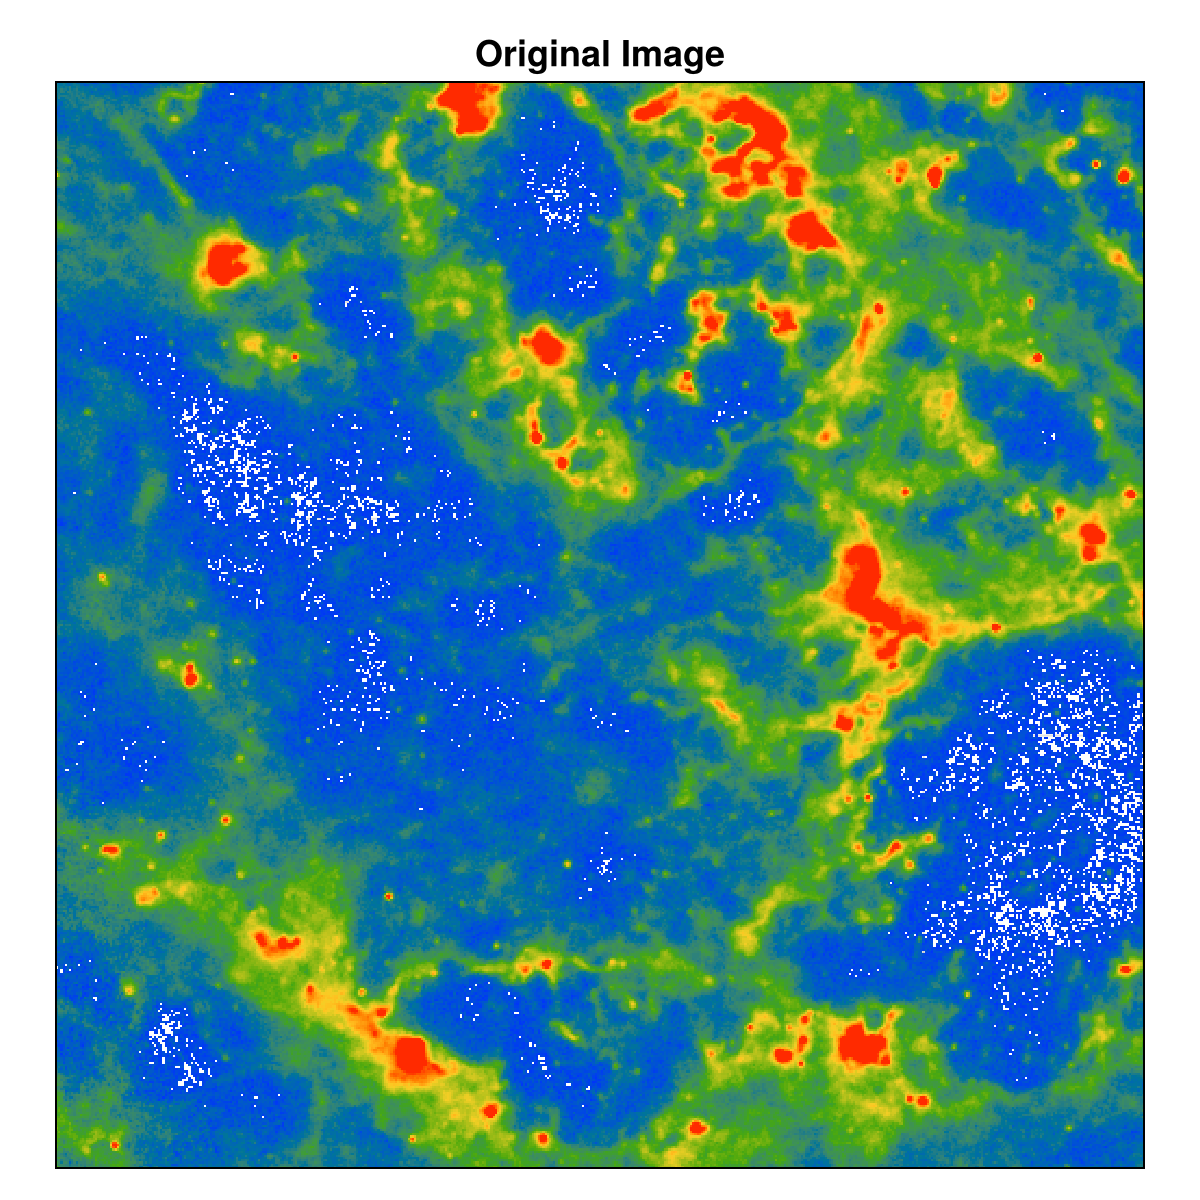

In [13]:
dv = 250
fig = Figure(size=(600, 600), fontsize=18)
ax = Axis(fig[1,1], aspect=1, title="Original Image", xticksvisible=false, yticksvisible=false, 
          xticklabelsvisible=false, yticklabelsvisible=false)
h = heatmap!(ax,raw_image[(cenx-dv):(cenx+dv),(ceny-dv):(ceny+dv)]',
    colormap=:rainbow_bgyr_35_85_c73_n256,
    colorrange=(vmin,vmax)
)

resize_to_layout!(fig)
fig